# Assignment 5

<h1> Assignment Outcomes: </h1>

- You should be able to create machine learning models and be able to increase its performance using various methods.

<b> Instruction: </b> <br>
From the same dataset you used in assignment 3, create a churn probability prediction using various models you have learned in class. What you should do: <br>
<ul>
    <li> Create several machine learning models </li>
    <li> Compare these models based on performance level, don't forget to increase the performance level with hyperparameter tuning or other methods. </li>
    <li> Decide which machine learning model the business should use to solve a business problem.  </li>
    <li> Create segmentation from the insights of the model that you choose to help the team make business decisions. </li>
</ul>

<b> Submission: </b> <br>
Submit the document in a notebook format of max 6 pages when printed. <br>
Submit with the following format: #05_3 last digit of participant ID_Nama Lengkap. Example: #05_300_Alya Aliski

<b> Assessment requirement: </b>
<ul>
    <li> Various models created </li>
    <li> Check for performance level and performance level is boosted. </li>
    <li> Create segmentation based on insight </li>
    <li> Gather insight and make business decisions for team (e.g how to decrease churn?) </li>
</ul>

# Data Information

In [ ]:
# Mounting in drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Gambar
from IPython.display import Image

<h2> About Dataset </h2>
<hr>
<h3><b> Brazilian E-Commerce Public Dataset by Olist </b></h3>

<p> Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates. </p>

<p> This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses. </p>

<hr>
<h4><b> Join it With the Marketing Funnel by Olist </b></h4>

<p> We have also released a Marketing Funnel Dataset. You may join both datasets and see an order from Marketing perspective now! <br>

Instructions on joining are available on this Kernel. </p>

<hr>
<h4><b> Context </b></h4>

<p> This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com </p>

<p> After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments. </p>

<hr>
<h4><b> Attention </b></h4>

<ul>
    <li> An order might have multiple items. </li>
    <li> Each item might be fulfilled by a distinct seller. </li>
    <li> All text identifying stores and partners where replaced by the names of Game of Thrones great houses. </li>
</ul>

<hr>
<h4><b> Example of a product listing on a marketplace </b></h4>

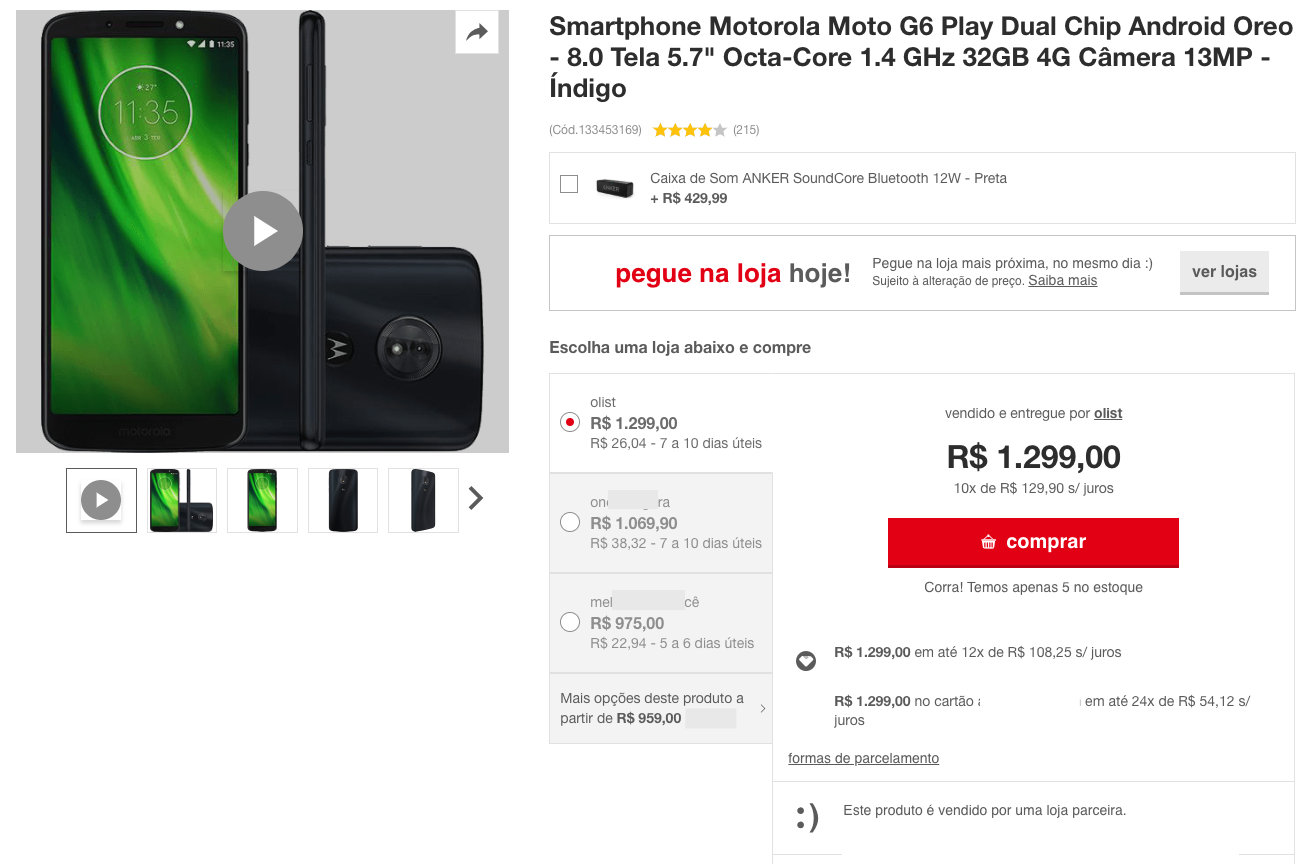

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 5/example_product.png')

<hr>
<h4><b> Data Schema </b></h4>
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

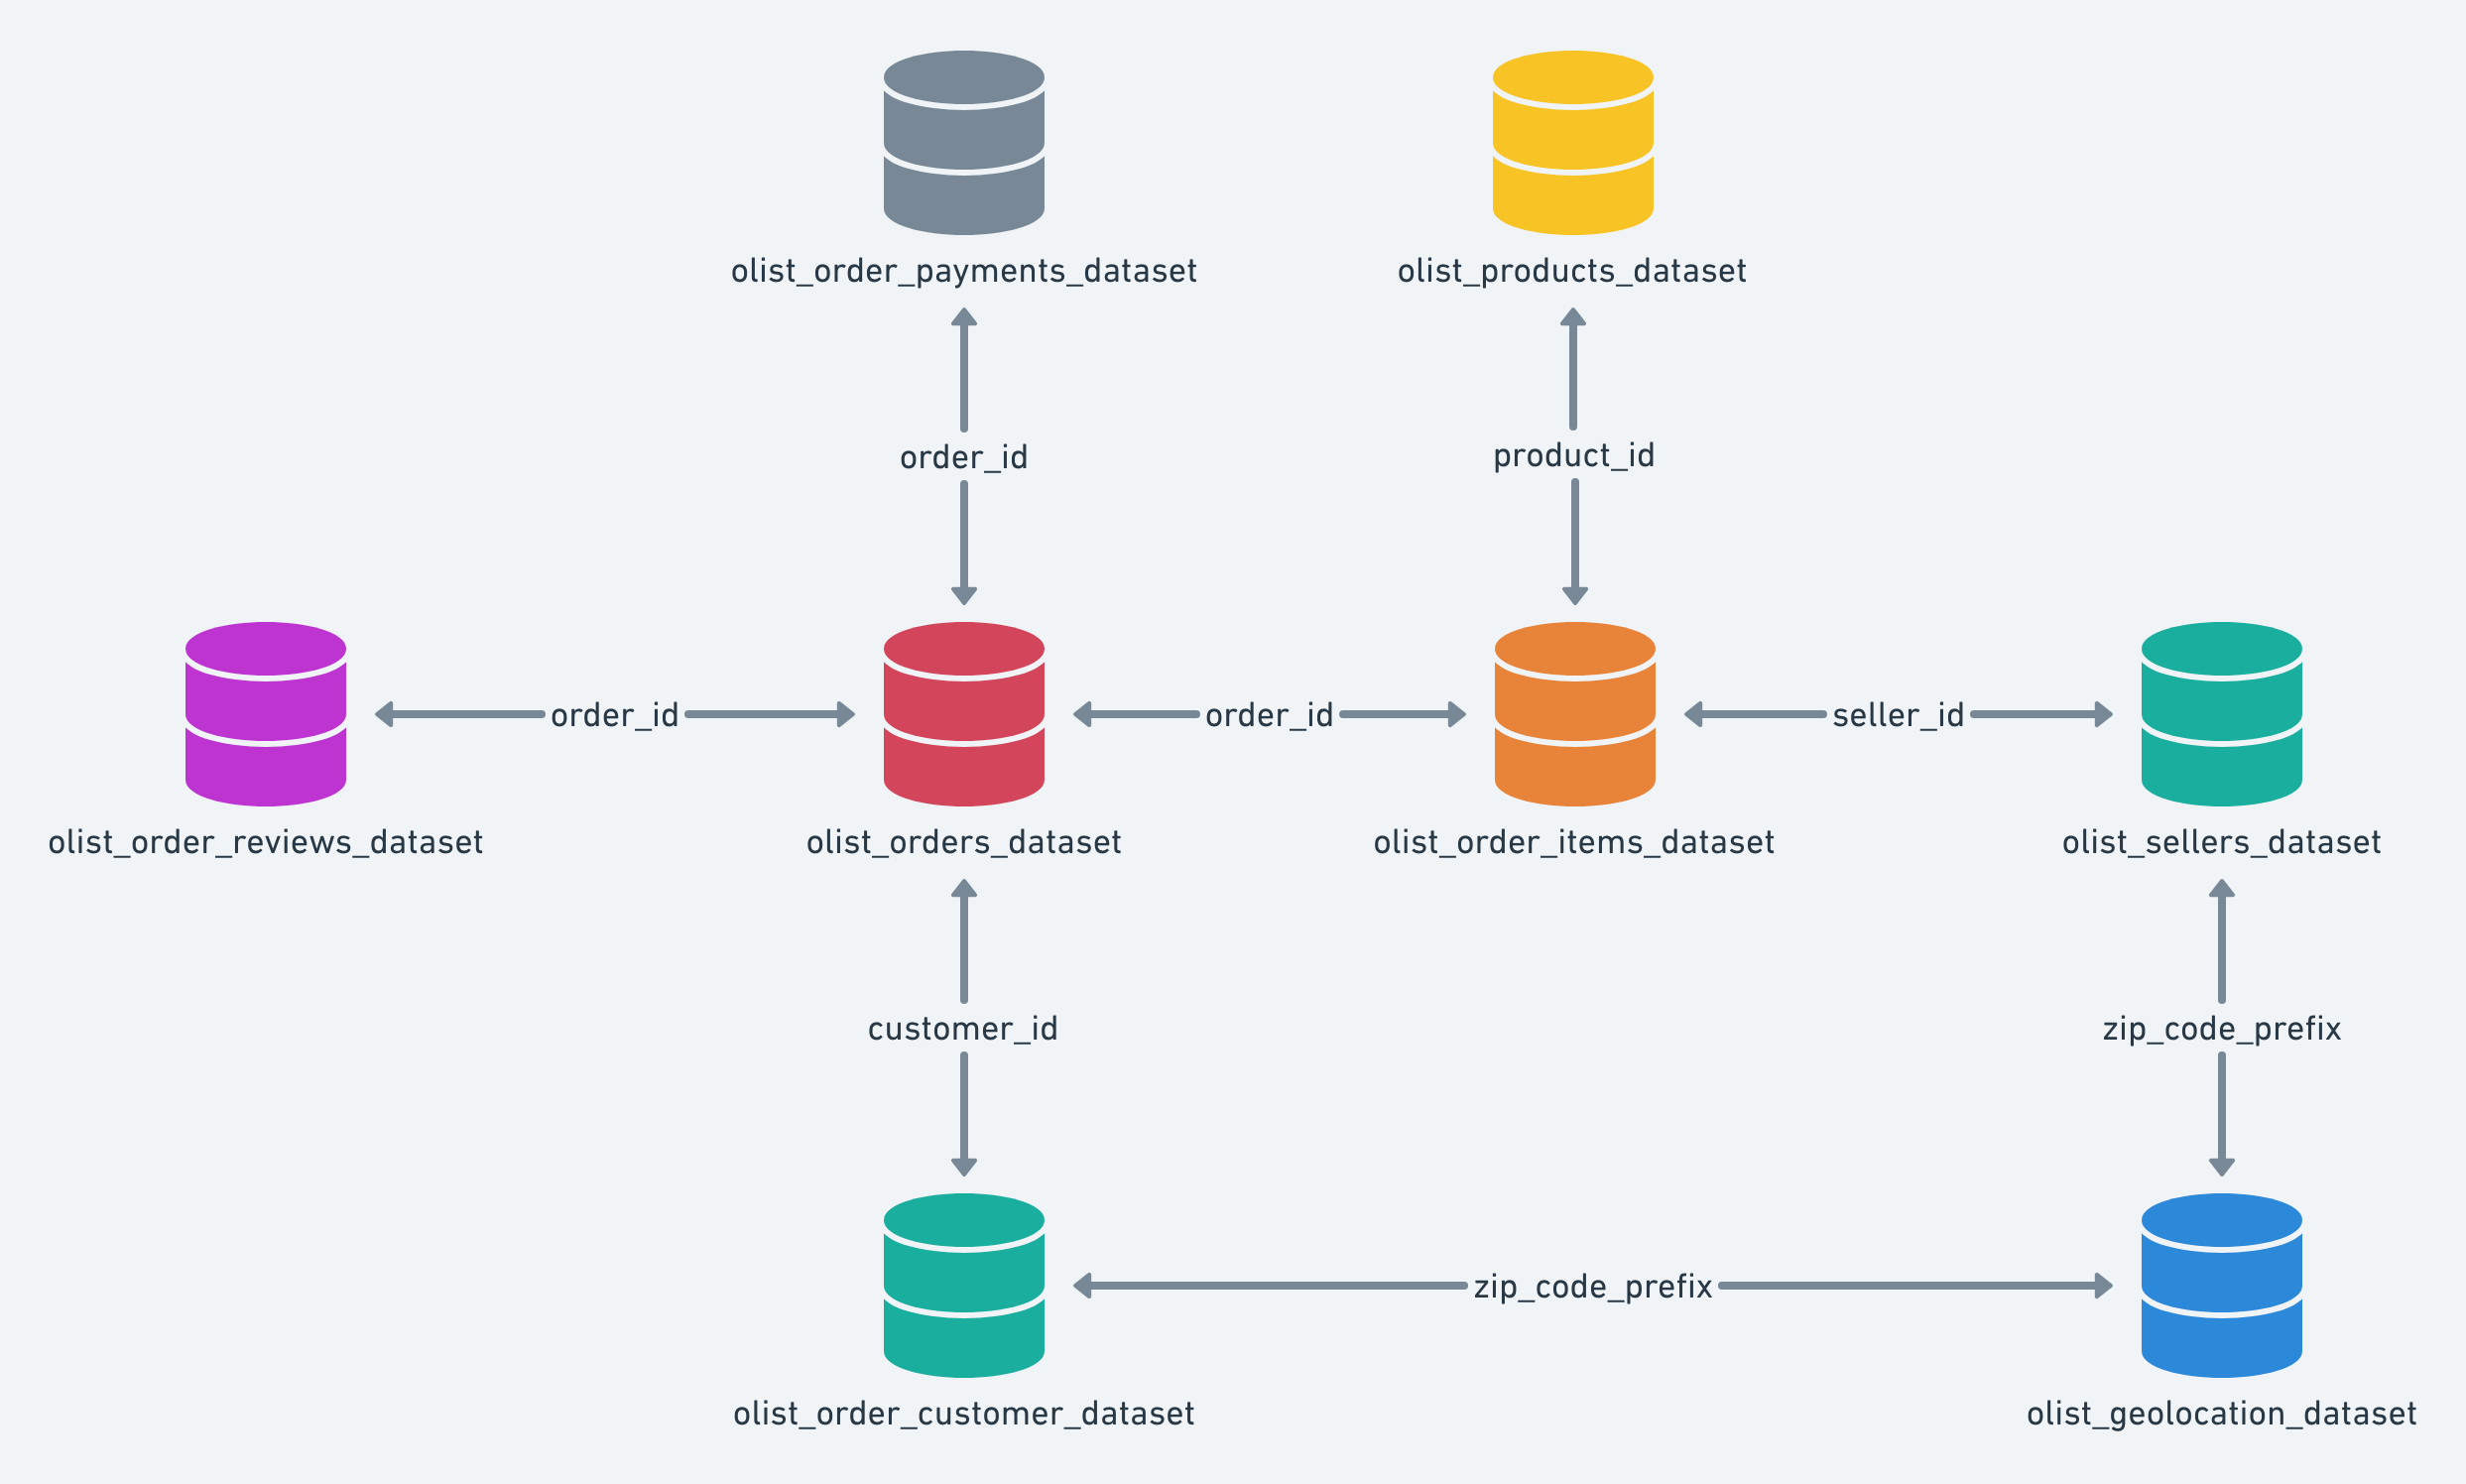

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 5/schema.png')

<hr>
<h4><b> Classified Dataset </b></h4>

<p> We had previously released a classified dataset, but we removed it at Version 6. We intend to release it again as a new dataset with a new data schema. While we don't finish it, you may use the classified dataset available at the Version 5 or previous. </p>

<hr>
<h4><b> Inspiration </b></h4>

Here are some inspiration for possible outcomes from this dataset.

NLP:

This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

Clustering:

Some customers didn't write a review. But why are they happy or mad?

Sales Prediction:

With purchase date information you'll be able to predict future sales.

Delivery Performance:

You will also be able to work through delivery performance and find ways to optimize delivery times.

Product Quality:

Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

Feature Engineering:

Create features from this rich dataset or attach some external public information to it.

<hr>
<h4><b> Acknowledgements </b></h4>

<p> Thanks to Olist for releasing this dataset.</p>


# Import Library

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Read Data

In [ ]:
# Expand Layout
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_customers_dataset.csv')
geoLocation = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_geolocation_dataset.csv')
orderItems = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_order_items_dataset.csv')
orderPayments = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_order_payments_dataset.csv')
orderReviews = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_orders_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_products_dataset.csv')
sellers = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/olist_sellers_dataset.csv')
categoryName = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 5/product_category_name_translation.csv')

# Preprocessing Data

## customers

In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Data Cleaning

#### Missing Value

In [ ]:
customers.isna().values.any()

False

In [ ]:
# Run if result from customers.isna().values.any() is True
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Duplicated Data

In [ ]:
customers.duplicated().values.any()

False

In [ ]:
# Run if result from customers.duplicated().values.any() is True
customers.duplicated().sum()

0

#### Manipulating Column Name

In [ ]:
customers.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
customers.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## geoLocation

In [ ]:
geoLocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
geoLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Data Cleaning

#### Missing Value

In [ ]:
geoLocation.isna().values.any()

False

In [ ]:
# Run if result from geoLocation.isna().values.any() is True
geoLocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Duplicated Data

In [ ]:
geoLocation.duplicated().values.any()

True

In [ ]:
# Run if result from geoLocation.duplicated().values.any() is True
geoLocation.duplicated().sum()

261831

In [ ]:
# Remove duplicated data
geoLocation.drop_duplicates(inplace=True)
geoLocation.duplicated().sum()

0

#### Manipulating Column Name

In [ ]:
geoLocation.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
geoLocation.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## orderItems

In [ ]:
orderItems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Data Cleaning

#### Missing Value

In [ ]:
orderItems.isna().values.any()

False

In [ ]:
# Run if result from orderItems.isna().values.any() is True
orderItems.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### Duplicated Data

In [ ]:
orderItems.duplicated().values.any()

False

In [ ]:
# Run if result from orderItems.duplicated().values.any() is True
orderItems.duplicated().sum()

0

#### Manipulation Format in shipping_limit_date

In [ ]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems['shipping_limit_date']).dt.date
orderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14


In [ ]:
orderItems['shipping_limit_date'] = pd.to_datetime(orderItems['shipping_limit_date'], format='%Y-%m-%d')
orderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## orderPayments

In [ ]:
orderPayments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
orderPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Data Cleaning

#### Missing Value

In [ ]:
orderPayments.isna().values.any()

False

In [ ]:
# Run if result from orderPayments.isna().values.any() is True
orderPayments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Duplicated Data

In [ ]:
orderPayments.duplicated().values.any()

False

In [ ]:
# Run if result from orderPayments.duplicated().values.any() is True
orderPayments.duplicated().sum()

0

## orderReviews

In [ ]:
orderReviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [ ]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


### Data Cleaning

#### Missing Value

In [ ]:
orderReviews.isna().values.any()

True

In [ ]:
# Run if result from orderReviews.isna().values.any() is True
orderReviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
orderReviews['review_comment_title'].fillna('no comment title', inplace=True)
orderReviews['review_comment_message'].fillna('no comment message', inplace=True)
orderReviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Duplicated Data

In [ ]:
orderReviews.duplicated().values.any()

False

In [ ]:
# Run if result from orderReviews.duplicated().values.any() is True
orderReviews.duplicated().sum()

0

#### Manipulation Format in review_creation_date and review_answer_timestamp

In [ ]:
orderReviews['review_creation_date'] = pd.to_datetime(orderReviews['review_creation_date']).dt.date
orderReviews['review_answer_timestamp'] = pd.to_datetime(orderReviews['review_answer_timestamp']).dt.date

In [ ]:
orderReviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,no comment title,no comment message,2018-01-18,2018-01-18
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,no comment title,no comment message,2018-03-10,2018-03-11
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,no comment title,no comment message,2018-02-17,2018-02-18
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,no comment title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,no comment title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02


In [ ]:
orderReviews['review_creation_date'] = pd.to_datetime(orderReviews['review_creation_date'], format='%Y-%m-%d')
orderReviews['review_answer_timestamp'] = pd.to_datetime(orderReviews['review_answer_timestamp'], format='%Y-%m-%d')

In [ ]:
orderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## orders

In [ ]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Data Cleaning

#### Missing Value

In [ ]:
orders.isna().values.any()

True

In [ ]:
# Run if result from orders.isna().values.any() is True
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders['order_approved_at'].fillna(0, inplace=True)
orders['order_delivered_carrier_date'].fillna(0, inplace=True)
orders['order_delivered_customer_date'].fillna(0, inplace=True)

In [ ]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Duplicated Data

In [ ]:
orders.duplicated().values.any()

False

In [ ]:
# Run if result from orders.duplicated().values.any() is True
orders.duplicated().sum()

0

#### Manipulation Format in

<ol>
  <li> order_purchase_timestamp </li>
  <li> order_approved_at </li>
  <li> order_delivered_carrier_date </li>
  <li> order_delivered_customer_date </li>
  <li> order_estimated_delivery_date </li>
</ol>




In [ ]:
new_orders = orders.copy()

In [ ]:
new_orders['order_purchase_timestamp'] = pd.to_datetime(new_orders['order_purchase_timestamp']).dt.date
new_orders['order_approved_at'] = pd.to_datetime(new_orders['order_approved_at']).dt.date
new_orders['order_delivered_carrier_date'] = pd.to_datetime(new_orders['order_delivered_carrier_date']).dt.date
new_orders['order_delivered_customer_date'] = pd.to_datetime(new_orders['order_delivered_customer_date']).dt.date
new_orders['order_estimated_delivery_date'] = pd.to_datetime(new_orders['order_estimated_delivery_date']).dt.date

In [ ]:
new_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26


In [ ]:
new_orders['order_purchase_timestamp'] = pd.to_datetime(new_orders['order_purchase_timestamp'], format='%Y-%m-%d')
new_orders['order_approved_at'] = pd.to_datetime(new_orders['order_approved_at'], format='%Y-%m-%d')
new_orders['order_delivered_carrier_date'] = pd.to_datetime(new_orders['order_delivered_carrier_date'], format='%Y-%m-%d')
new_orders['order_delivered_customer_date'] = pd.to_datetime(new_orders['order_delivered_customer_date'], format='%Y-%m-%d')
new_orders['order_estimated_delivery_date'] = pd.to_datetime(new_orders['order_estimated_delivery_date'], format='%Y-%m-%d')

In [ ]:
new_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


## products

In [ ]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Data Cleaning

#### Missing Value

In [ ]:
products.isna().values.any()

True

In [ ]:
# Run if result from products.isna().values.any() is True
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products['product_category_name'].fillna('unnamed', inplace=True)
products['product_name_lenght'].fillna(0, inplace=True)
products['product_description_lenght'].fillna(0, inplace=True)
products['product_photos_qty'].fillna(0, inplace=True)
products['product_weight_g'].fillna(0, inplace=True)
products['product_length_cm'].fillna(0, inplace=True)
products['product_height_cm'].fillna(0, inplace=True)
products['product_width_cm'].fillna(0, inplace=True)

In [ ]:
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Duplicated Data

In [ ]:
products.duplicated().values.any()

False

In [ ]:
# Run if result from products.duplicated().values.any() is True
products.duplicated().sum()

0

### Outliers

## sellers

In [ ]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Data Cleaning

#### Missing Value

In [ ]:
sellers.isna().values.any()

False

In [ ]:
# Run if result from sellers.isna().values.any() is True
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### Duplicated Data

In [ ]:
sellers.duplicated().values.any()

False

In [ ]:
# Run if result from sellers.duplicated().values.any() is True
sellers.duplicated().sum()

0

#### Manipulating Column Name

In [ ]:
sellers.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
sellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## categoryName

In [ ]:
categoryName

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [ ]:
categoryName.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


### Data Cleaning

#### Missing Value

In [ ]:
categoryName.isna().values.any()

False

In [ ]:
# Run if result from categoryName.isna().values.any() is True
categoryName.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### Duplicated Data

In [ ]:
categoryName.duplicated().values.any()

False

In [ ]:
# Run if result from categoryName.duplicated().values.any() is True
categoryName.duplicated().sum()

0

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Total Customer')

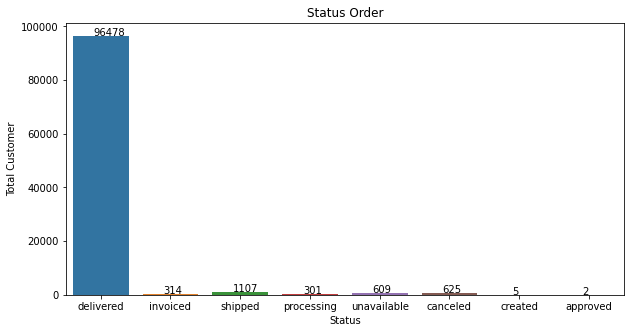

In [ ]:
# Distribution of Order Sttatus
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=orders, x='order_status')
for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 10
    ax.text(txt_x, txt_y, txt)

plt.title('Status Order')
plt.xlabel('Status')
plt.ylabel('Total Customer')

Text(0, 0.5, 'Total Customer')

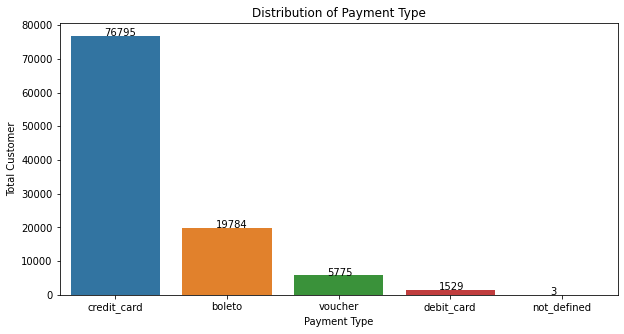

In [ ]:
# Distribution of Payment Type
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=orderPayments,  x='payment_type')
for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x() + 0.3
    txt_y = p.get_height() + 10
    ax.text(txt_x, txt_y, txt)

plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Customer')

Text(0, 0.5, 'Total Customer')

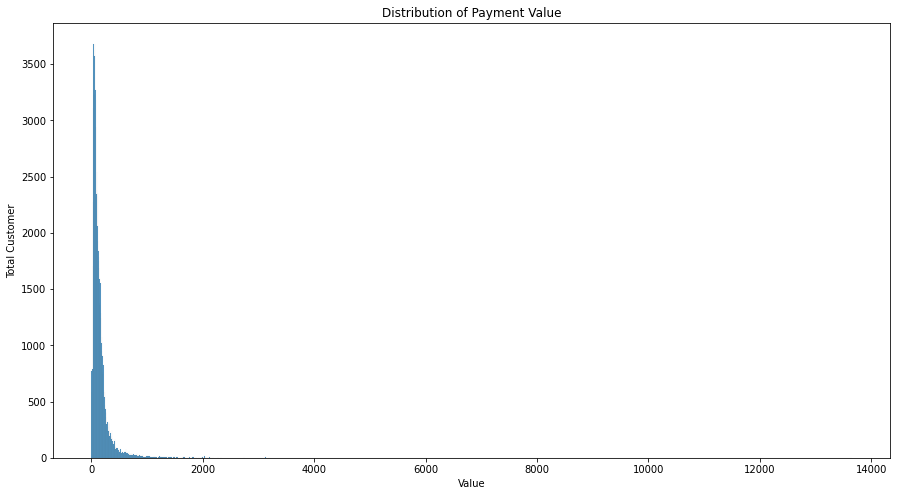

In [ ]:
# Distribution of Payment Value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=orderPayments)
plt.title('Distribution of Payment Value')
plt.xlabel('Value')
plt.ylabel('Total Customer')

Text(0, 0.5, 'Total Customer')

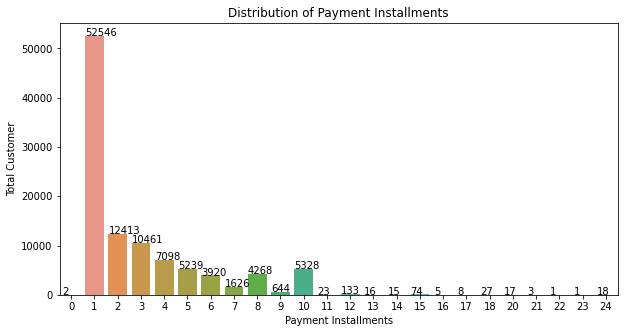

In [ ]:
# Distribution of Payment Installments
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=orderPayments, x='payment_installments')
for p in ax.patches:
    txt = str(p.get_height())
    txt_x = p.get_x()
    txt_y = p.get_height()
    ax.text(txt_x, txt_y, txt)

plt.title('Distribution of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('Total Customer')

# Merging

In [ ]:
data = customers.merge(new_orders,
                        on='customer_id').merge(orderPayments,
                                                 on='order_id').merge(orderItems,
                                                                       on='order_id')
data

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,1,credit_card,2,146.87,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,2018-01-12,2018-01-15,2018-01-29,2018-02-06,1,credit_card,8,335.48,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,2018-05-20,2018-06-11,2018-06-14,2018-06-13,1,credit_card,7,157.73,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,2018-03-13,2018-03-27,2018-03-28,2018-04-10,1,credit_card,1,173.30,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,2018-07-29,2018-07-30,2018-08-09,2018-08-15,1,credit_card,8,252.25,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31,230.00,22.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,2018-04-07,2018-04-11,2018-04-13,2018-04-25,1,credit_card,6,88.78,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,2018-04-12,74.90,13.88
117597,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,2018-04-04,2018-04-05,2018-04-11,2018-04-20,1,credit_card,3,129.06,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,2018-04-10,114.90,14.16
117598,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,2018-04-08,2018-04-09,2018-05-09,2018-05-02,1,credit_card,5,56.04,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,2018-04-12,37.00,19.04
117599,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,2017-11-03,2017-11-06,2017-11-16,2017-12-05,1,credit_card,2,711.07,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,2017-11-09,689.00,22.07


# Feature Engineering #1

In [ ]:
new_data = data[['customer_id',
                 'order_id',
                 'order_status',
                 'order_purchase_timestamp',
                 'payment_type',
                 'payment_installments',
                 'payment_value',
                 ]]
new_data

,customer_id,order_id,order_status,order_purchase_timestamp,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,credit_card,8,252.25
...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,credit_card,6,88.78
117597,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,credit_card,3,129.06
117598,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,credit_card,5,56.04
117599,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,credit_card,2,711.07


In [ ]:
new_data['order_status'].value_counts()

delivered      115035
shipped          1244
canceled          566
processing        375
invoiced          371
unavailable         7
approved            3
Name: order_status, dtype: int64

In [ ]:
first_step = new_data[(new_data.order_status != 'canceled') & (new_data.order_status != 'unavailable')]
first_step

,customer_id,order_id,order_status,order_purchase_timestamp,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29,credit_card,8,252.25
...,...,...,...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07,credit_card,6,88.78
117597,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04,credit_card,3,129.06
117598,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08,credit_card,5,56.04
117599,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03,credit_card,2,711.07


### Trial #1 (Final Customer)

In [ ]:
second_step = first_step[['customer_id', 'order_purchase_timestamp']]

# Max date in order_purchase_timestamp
second_step.sort_values(by='order_purchase_timestamp', ascending=False)

,customer_id,order_purchase_timestamp
78427,4b7decb9b58e2569548b8b4c8e20e8d7,2018-09-03
106300,448945bc713d98b6726e82eda6249b9e,2018-08-29
100668,10a79ef2783cae3d8d678e85fde235ac,2018-08-29
106297,448945bc713d98b6726e82eda6249b9e,2018-08-29
106299,448945bc713d98b6726e82eda6249b9e,2018-08-29
...,...,...
69859,dc607dc98d6a11d5d04d9f2a70aa6c34,2016-10-03
23583,7812fcebfc5e8065d31e1bb5f0017dae,2016-10-03
66453,b8cf418e97ae795672d326288dfab7a7,2016-10-03
100194,08c5351a6aca1c1589a38f244edeee9d,2016-09-04


In [ ]:
second_step['date_state'] = '2018-03-31' # last 6 months
second_step

,customer_id,order_purchase_timestamp,date_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16,2018-03-31
1,18955e83d337fd6b2def6b18a428ac77,2018-01-12,2018-03-31
2,4e7b3e00288586ebd08712fdd0374a03,2018-05-19,2018-03-31
3,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13,2018-03-31
4,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29,2018-03-31
...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07,2018-03-31
117597,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04,2018-03-31
117598,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08,2018-03-31
117599,56b18e2166679b8a959d72dd06da27f9,2017-11-03,2018-03-31


In [ ]:
second_step.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117028 entries, 0 to 117600
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               117028 non-null  object        
 1   order_purchase_timestamp  117028 non-null  datetime64[ns]
 2   date_state                117028 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.6+ MB


In [ ]:
second_step['date_state'] = pd.to_datetime(second_step['date_state'], format='%Y-%m-%d')
second_step.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117028 entries, 0 to 117600
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               117028 non-null  object        
 1   order_purchase_timestamp  117028 non-null  datetime64[ns]
 2   date_state                117028 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 3.6+ MB


In [ ]:
final_customer = second_step.copy()
final_customer

,customer_id,order_purchase_timestamp,date_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16,2018-03-31
1,18955e83d337fd6b2def6b18a428ac77,2018-01-12,2018-03-31
2,4e7b3e00288586ebd08712fdd0374a03,2018-05-19,2018-03-31
3,b2b6027bc5c5109e529d4dc6358b12c3,2018-03-13,2018-03-31
4,4f2d8ab171c80ec8364f7c12e35b23ad,2018-07-29,2018-03-31
...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,2018-04-07,2018-03-31
117597,e7b71a9017aa05c9a7fd292d714858e8,2018-04-04,2018-03-31
117598,5e28dfe12db7fb50a4b2f691faecea5e,2018-04-08,2018-03-31
117599,56b18e2166679b8a959d72dd06da27f9,2017-11-03,2018-03-31


### Trial #2 (Customer Order)

In [ ]:
pre_customer_order = first_step[['customer_id', 'order_id']]
pre_customer_order

,customer_id,order_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f
...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298
117597,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b
117598,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c
117599,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2


In [ ]:
customer_order = pre_customer_order.merge(final_customer, on='customer_id', how='inner')
customer_order

,customer_id,order_id,order_purchase_timestamp,date_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,2018-03-31
1,18955e83d337fd6b2def6b18a428ac77,29150127e6685892b6eab3eec79f59c7,2018-01-12,2018-03-31
2,4e7b3e00288586ebd08712fdd0374a03,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,2018-03-31
3,b2b6027bc5c5109e529d4dc6358b12c3,951670f92359f4fe4a63112aa7306eba,2018-03-13,2018-03-31
4,4f2d8ab171c80ec8364f7c12e35b23ad,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,2018-03-31
...,...,...,...,...
192451,17ddf5dd5d51696bb3d7c6291687be6f,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,2018-03-31
192452,e7b71a9017aa05c9a7fd292d714858e8,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,2018-03-31
192453,5e28dfe12db7fb50a4b2f691faecea5e,fed4434add09a6f332ea398efd656a5c,2018-04-08,2018-03-31
192454,56b18e2166679b8a959d72dd06da27f9,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,2018-03-31


### Trial #3 (Customer Payment)

In [ ]:
pre_customer_payment = first_step[['customer_id', 'payment_type', 'payment_installments', 'payment_value']]
pre_customer_payment

,customer_id,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,credit_card,8,252.25
...,...,...,...,...
117596,17ddf5dd5d51696bb3d7c6291687be6f,credit_card,6,88.78
117597,e7b71a9017aa05c9a7fd292d714858e8,credit_card,3,129.06
117598,5e28dfe12db7fb50a4b2f691faecea5e,credit_card,5,56.04
117599,56b18e2166679b8a959d72dd06da27f9,credit_card,2,711.07


In [ ]:
customer_payment = pre_customer_payment.merge(customer_order, on='customer_id', how='inner')
customer_payment

,customer_id,payment_type,payment_installments,payment_value,order_id,order_purchase_timestamp,date_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,credit_card,2,146.87,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,2018-03-31
1,18955e83d337fd6b2def6b18a428ac77,credit_card,8,335.48,29150127e6685892b6eab3eec79f59c7,2018-01-12,2018-03-31
2,4e7b3e00288586ebd08712fdd0374a03,credit_card,7,157.73,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,2018-03-31
3,b2b6027bc5c5109e529d4dc6358b12c3,credit_card,1,173.30,951670f92359f4fe4a63112aa7306eba,2018-03-13,2018-03-31
4,4f2d8ab171c80ec8364f7c12e35b23ad,credit_card,8,252.25,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,2018-03-31
...,...,...,...,...,...,...,...
965213,17ddf5dd5d51696bb3d7c6291687be6f,credit_card,6,88.78,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,2018-03-31
965214,e7b71a9017aa05c9a7fd292d714858e8,credit_card,3,129.06,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,2018-03-31
965215,5e28dfe12db7fb50a4b2f691faecea5e,credit_card,5,56.04,fed4434add09a6f332ea398efd656a5c,2018-04-08,2018-03-31
965216,56b18e2166679b8a959d72dd06da27f9,credit_card,2,711.07,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,2018-03-31


### Trial #4 (Order Payment)

In [ ]:
customer_payment['diff_month'] = (customer_payment['date_state'] - customer_payment['order_purchase_timestamp']) / np.timedelta64(1, 'M')
customer_payment

,customer_id,payment_type,payment_installments,payment_value,order_id,order_purchase_timestamp,date_state,diff_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,credit_card,2,146.87,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,2018-03-31,10.480708
1,18955e83d337fd6b2def6b18a428ac77,credit_card,8,335.48,29150127e6685892b6eab3eec79f59c7,2018-01-12,2018-03-31,2.562681
2,4e7b3e00288586ebd08712fdd0374a03,credit_card,7,157.73,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,2018-03-31,-1.609889
3,b2b6027bc5c5109e529d4dc6358b12c3,credit_card,1,173.30,951670f92359f4fe4a63112aa7306eba,2018-03-13,2018-03-31,0.591388
4,4f2d8ab171c80ec8364f7c12e35b23ad,credit_card,8,252.25,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,2018-03-31,-3.942586
...,...,...,...,...,...,...,...,...
965213,17ddf5dd5d51696bb3d7c6291687be6f,credit_card,6,88.78,6760e20addcf0121e9d58f2f1ff14298,2018-04-07,2018-03-31,-0.229984
965214,e7b71a9017aa05c9a7fd292d714858e8,credit_card,3,129.06,9ec0c8947d973db4f4e8dcf1fbfa8f1b,2018-04-04,2018-03-31,-0.131420
965215,5e28dfe12db7fb50a4b2f691faecea5e,credit_card,5,56.04,fed4434add09a6f332ea398efd656a5c,2018-04-08,2018-03-31,-0.262839
965216,56b18e2166679b8a959d72dd06da27f9,credit_card,2,711.07,e31ec91cea1ecf97797787471f98a8c2,2017-11-03,2018-03-31,4.862523


In [ ]:
customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965218 entries, 0 to 965217
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               965218 non-null  object        
 1   payment_type              965218 non-null  object        
 2   payment_installments      965218 non-null  int64         
 3   payment_value             965218 non-null  float64       
 4   order_id                  965218 non-null  object        
 5   order_purchase_timestamp  965218 non-null  datetime64[ns]
 6   date_state                965218 non-null  datetime64[ns]
 7   diff_month                965218 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 66.3+ MB


In [ ]:
final_customer_payment = customer_payment.astype({"diff_month":'int'})
final_customer_payment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965218 entries, 0 to 965217
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               965218 non-null  object        
 1   payment_type              965218 non-null  object        
 2   payment_installments      965218 non-null  int64         
 3   payment_value             965218 non-null  float64       
 4   order_id                  965218 non-null  object        
 5   order_purchase_timestamp  965218 non-null  datetime64[ns]
 6   date_state                965218 non-null  datetime64[ns]
 7   diff_month                965218 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 66.3+ MB


In [ ]:
order_payment = final_customer_payment.groupby(['customer_id', 'payment_type', 'order_purchase_timestamp', 'date_state', 'diff_month']).agg(
    total_order = ('order_id', 'count'),
    total_installments = ('payment_installments', 'sum'),
    total_payment = ('payment_value', 'sum')
)
order_payment

total_order  \
customer_id                      payment_type order_purchase_timestamp date_state diff_month                
00012a2ce6f8dcda20d059ce98491703 credit_card  2017-11-14               2018-03-31  4                    1   
000161a058600d5901f007fab4c27140 credit_card  2017-07-16               2018-03-31  8                    1   
0001fd6190edaaf884bcaf3d49edf079 credit_card  2017-02-28               2018-03-31  13                   1   
0002414f95344307404f0ace7a26f1d5 boleto       2017-08-16               2018-03-31  7                    1   
000379cdec625522490c315e70c7a9fb boleto       2018-04-02               2018-03-31  0                    1   
...                                                                                                   ...   
fffecc9f79fd8c764f843e9951b11341 credit_card  2018-03-29               2018-03-31  0                    9   
                                 voucher      2018-03-29               2018-03-31  0                   18   
fffeda5b6d849fbd39689bb92087f431 credit_card  2018-05-22               2018-03-31 -1                    1   
ffff42319e9b2d713724ae527742af25 credit_card  2018-06-13               2018-03-31 -2                    1   
ffffa3172527f765de70084a7e53aae8 credit_card  2017-09-02               2018-03-31  6                    8   

                                                                                              total_installments  \
customer_id                      payment_type order_purchase_timestamp date_state diff_month                       
00012a2ce6f8dcda20d059ce98491703 credit_card  2017-11-14               2018-03-31  4                           8   
000161a058600d5901f007fab4c27140 credit_card  2017-07-16               2018-03-31  8                           5   
0001fd6190edaaf884bcaf3d49edf079 credit_card  2017-02-28               2018-03-31  13                         10   
0002414f95344307404f0ace7a26f1d5 boleto       2017-08-16               2018-03-31  7                           1   
000379cdec625522490c315e70c7a9fb boleto       2018-04-02               2018-03-31  0                           1   
...                                                                                                          ...   
fffecc9f79fd8c764f843e9951b11341 credit_card  2018-03-29               2018-03-31  0                           9   
                                 voucher      2018-03-29               2018-03-31  0                          18   
fffeda5b6d849fbd39689bb92087f431 credit_card  2018-05-22               2018-03-31 -1                           3   
ffff42319e9b2d713724ae527742af25 credit_card  2018-06-13               2018-03-31 -2                           2   
ffffa3172527f765de70084a7e53aae8 credit_card  2017-09-02               2018-03-31  6                          32   

                                                                                              total_payment  
customer_id                      payment_type order_purchase_timestamp date_state diff_month                 
00012a2ce6f8dcda20d059ce98491703 credit_card  2017-11-14               2018-03-31  4                 114.74  
000161a058600d5901f007fab4c27140 credit_card  2017-07-16               2018-03-31  8                  67.41  
0001fd6190edaaf884bcaf3d49edf079 credit_card  2017-02-28               2018-03-31  13                195.42  
0002414f95344307404f0ace7a26f1d5 boleto       2017-08-16               2018-03-31  7                 179.35  
000379cdec625522490c315e70c7a9fb boleto       2018-04-02               2018-03-31  0                 107.01  
...                                                                                                     ...  
fffecc9f79fd8c764f843e9951b11341 credit_card  2018-03-29               2018-03-31  0                   5.76  
                                 voucher      2018-03-29               2018-03-31  0                 726.48  
fffeda5b6d849fbd39689bb92087f431 credit_card  2018-05-22           

In [ ]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100409 entries, ('00012a2ce6f8dcda20d059ce98491703', 'credit_card', Timestamp('2017-11-14 00:00:00'), Timestamp('2018-03-31 00:00:00'), 4) to ('ffffa3172527f765de70084a7e53aae8', 'credit_card', Timestamp('2017-09-02 00:00:00'), Timestamp('2018-03-31 00:00:00'), 6)
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   total_order         100409 non-null  int64  
 1   total_installments  100409 non-null  int64  
 2   total_payment       100409 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.9+ MB


In [ ]:
final_order_payment = order_payment.astype({"total_payment":'int'})
final_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100409 entries, ('00012a2ce6f8dcda20d059ce98491703', 'credit_card', Timestamp('2017-11-14 00:00:00'), Timestamp('2018-03-31 00:00:00'), 4) to ('ffffa3172527f765de70084a7e53aae8', 'credit_card', Timestamp('2017-09-02 00:00:00'), Timestamp('2018-03-31 00:00:00'), 6)
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   total_order         100409 non-null  int64
 1   total_installments  100409 non-null  int64
 2   total_payment       100409 non-null  int64
dtypes: int64(3)
memory usage: 3.9+ MB


In [ ]:
first_segmentation = final_order_payment.reset_index()
first_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107
...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214


### Trial #5 (First Segmentation)

In [ ]:
first_segmentation['diff_month'].describe()

count    100409.000000
mean          2.784950
std           4.698451
min          -5.000000
25%          -1.000000
50%           2.000000
75%           6.000000
max          18.000000
Name: diff_month, dtype: float64

In [ ]:
first_segmentation.loc[(first_segmentation['total_order']>=1)&(first_segmentation['diff_month']>6), 'first_segmentation'] = 'Inactive'
first_segmentation.loc[(first_segmentation['total_order']>=1)&(first_segmentation['diff_month']>=3)&(first_segmentation['diff_month']<=6),'first_segmentation'] = 'Defecting'
first_segmentation.loc[(first_segmentation['total_order']>1)&(first_segmentation['diff_month']<3), 'first_segmentation'] = 'Active'
first_segmentation.loc[(first_segmentation['total_order']==1)&(first_segmentation['diff_month']<3), 'first_segmentation'] = 'First Timer'
first_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114,Defecting
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67,Inactive
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195,Inactive
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179,Inactive
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107,First Timer
...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5,Active
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726,Active
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63,First Timer
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214,First Timer


In [ ]:
first_segmentation['basket_size'] = first_segmentation['total_payment'] / first_segmentation['total_order']
first_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation,basket_size
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114,Defecting,114.000000
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67,Inactive,67.000000
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195,Inactive,195.000000
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179,Inactive,179.000000
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107,First Timer,107.000000
...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5,Active,0.555556
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726,Active,40.333333
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63,First Timer,63.000000
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214,First Timer,214.000000


In [ ]:
first_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100409 entries, 0 to 100408
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               100409 non-null  object        
 1   payment_type              100409 non-null  object        
 2   order_purchase_timestamp  100409 non-null  datetime64[ns]
 3   date_state                100409 non-null  datetime64[ns]
 4   diff_month                100409 non-null  int64         
 5   total_order               100409 non-null  int64         
 6   total_installments        100409 non-null  int64         
 7   total_payment             100409 non-null  int64         
 8   first_segmentation        100409 non-null  object        
 9   basket_size               100409 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 7.7+ MB


### Trial #6 (Second Segmentation = Monetary Segmentation)

In [ ]:
second_segmentation = first_segmentation.astype({"basket_size":'int'})
second_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation,basket_size
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114,Defecting,114
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67,Inactive,67
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195,Inactive,195
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179,Inactive,179
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107,First Timer,107
...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5,Active,0
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726,Active,40
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63,First Timer,63
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214,First Timer,214


In [ ]:
second_segmentation['total_payment'].describe()

count    1.004090e+05
mean     1.893712e+03
std      8.904219e+04
min      0.000000e+00
25%      6.300000e+01
50%      1.140000e+02
75%      2.190000e+02
max      1.810240e+07
Name: total_payment, dtype: float64

In [ ]:
second_segmentation['basket_size'].describe()

count    100409.000000
mean        155.197771
std         215.463307
min           0.000000
25%          58.000000
50%         101.000000
75%         173.000000
max       13664.000000
Name: basket_size, dtype: float64

In [ ]:
second_segmentation.loc[(second_segmentation['basket_size'] < 50), 'monetary_segmentation'] = 'Low Spender'
second_segmentation.loc[(second_segmentation['basket_size'] >= 50) & (second_segmentation['basket_size'] <= 500), 'monetary_segmentation'] = 'Normal'
second_segmentation.loc[(second_segmentation['basket_size'] > 500) & (second_segmentation['basket_size'] <= 1000), 'monetary_segmentation'] = 'Silver'
second_segmentation.loc[(second_segmentation['basket_size'] > 1000) & (second_segmentation['basket_size'] <= 5000), 'monetary_segmentation'] = 'Gold'
second_segmentation.loc[(second_segmentation['basket_size'] > 5000), 'monetary_segmentation'] = 'Platinum'
second_segmentation.sort_values(by="order_purchase_timestamp", ascending=False)

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation
29587,4b7decb9b58e2569548b8b4c8e20e8d7,voucher,2018-09-03,2018-03-31,-5,1,1,166,First Timer,166,Normal
72715,b8c19e70d00f6927388e4f31c923d785,credit_card,2018-08-29,2018-03-31,-4,1,1,178,First Timer,178,Normal
28767,496630b6740bcca28fce9ba50d8a26ef,credit_card,2018-08-29,2018-03-31,-4,1,1,33,First Timer,33,Low Spender
77488,c4c66f47534e09a03fc7a878a9eda5ea,credit_card,2018-08-29,2018-03-31,-4,1,1,74,First Timer,74,Normal
89727,e450a297a7bc6839ceb0cf1a2377fa02,credit_card,2018-08-29,2018-03-31,-4,1,7,73,First Timer,73,Normal
...,...,...,...,...,...,...,...,...,...,...,...
47039,7812fcebfc5e8065d31e1bb5f0017dae,credit_card,2016-10-03,2018-03-31,17,1,4,40,Inactive,40,Low Spender
20936,355077684019f7f60a031656bd7262b8,boleto,2016-10-03,2018-03-31,17,1,1,45,Inactive,45,Low Spender
49713,7ec40b22510fdbea1b08921dd39e63d8,boleto,2016-10-03,2018-03-31,17,1,1,39,Inactive,39,Low Spender
90819,e6f959bf384d1d53b6d68826699bba12,credit_card,2016-10-03,2018-03-31,17,1,2,154,Inactive,154,Normal


In [ ]:
second_segmentation['monetary_segmentation'].value_counts()

Normal         77181
Low Spender    19107
Silver          3023
Gold            1092
Platinum           6
Name: monetary_segmentation, dtype: int64

In [ ]:
# Churn Segmentation
second_segmentation.loc[(second_segmentation['order_purchase_timestamp'] < '2018-03-01'), 'churn_segmentation'] = 'Churn'
second_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,churn_segmentation
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114,Defecting,114,Normal,Churn
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67,Inactive,67,Normal,Churn
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195,Inactive,195,Normal,Churn
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179,Inactive,179,Normal,Churn
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107,First Timer,107,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5,Active,0,Low Spender,NaN
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726,Active,40,Low Spender,NaN
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63,First Timer,63,Normal,NaN
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214,First Timer,214,Normal,NaN


In [ ]:
second_segmentation.loc[(second_segmentation['churn_segmentation'] == 'Churn'), 'segmentation_churn'] = 'Churn Customer'
second_segmentation.loc[(second_segmentation['churn_segmentation'] != 'Churn'), 'segmentation_churn'] = 'Non-Churn Customer'
second_segmentation

,customer_id,payment_type,order_purchase_timestamp,date_state,diff_month,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,churn_segmentation,segmentation_churn
0,00012a2ce6f8dcda20d059ce98491703,credit_card,2017-11-14,2018-03-31,4,1,8,114,Defecting,114,Normal,Churn,Churn Customer
1,000161a058600d5901f007fab4c27140,credit_card,2017-07-16,2018-03-31,8,1,5,67,Inactive,67,Normal,Churn,Churn Customer
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,2017-02-28,2018-03-31,13,1,10,195,Inactive,195,Normal,Churn,Churn Customer
3,0002414f95344307404f0ace7a26f1d5,boleto,2017-08-16,2018-03-31,7,1,1,179,Inactive,179,Normal,Churn,Churn Customer
4,000379cdec625522490c315e70c7a9fb,boleto,2018-04-02,2018-03-31,0,1,1,107,First Timer,107,Normal,NaN,Non-Churn Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,2018-03-29,2018-03-31,0,9,9,5,Active,0,Low Spender,NaN,Non-Churn Customer
100405,fffecc9f79fd8c764f843e9951b11341,voucher,2018-03-29,2018-03-31,0,18,18,726,Active,40,Low Spender,NaN,Non-Churn Customer
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,2018-05-22,2018-03-31,-1,1,3,63,First Timer,63,Normal,NaN,Non-Churn Customer
100407,ffff42319e9b2d713724ae527742af25,credit_card,2018-06-13,2018-03-31,-2,1,2,214,First Timer,214,Normal,NaN,Non-Churn Customer


### Last (Fix Segmentation)

In [ ]:
fix_segmentation = second_segmentation.drop(['order_purchase_timestamp', 'date_state', 'diff_month', 'churn_segmentation'], axis=1)
fix_segmentation

,customer_id,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,segmentation_churn
0,00012a2ce6f8dcda20d059ce98491703,credit_card,1,8,114,Defecting,114,Normal,Churn Customer
1,000161a058600d5901f007fab4c27140,credit_card,1,5,67,Inactive,67,Normal,Churn Customer
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,1,10,195,Inactive,195,Normal,Churn Customer
3,0002414f95344307404f0ace7a26f1d5,boleto,1,1,179,Inactive,179,Normal,Churn Customer
4,000379cdec625522490c315e70c7a9fb,boleto,1,1,107,First Timer,107,Normal,Non-Churn Customer
...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,9,9,5,Active,0,Low Spender,Non-Churn Customer
100405,fffecc9f79fd8c764f843e9951b11341,voucher,18,18,726,Active,40,Low Spender,Non-Churn Customer
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,1,3,63,First Timer,63,Normal,Non-Churn Customer
100407,ffff42319e9b2d713724ae527742af25,credit_card,1,2,214,First Timer,214,Normal,Non-Churn Customer


In [ ]:
grouping = fix_segmentation.groupby(['payment_type', 'first_segmentation', 'monetary_segmentation', 'segmentation_churn'])['customer_id'].nunique().reset_index()
grouping.rename(columns={'customer_id':'total_customer'}, inplace=True)
grouping.sort_values(by='total_customer', ascending=False)[0:10]

,payment_type,first_segmentation,monetary_segmentation,segmentation_churn,total_customer
46,credit_card,First Timer,Normal,Non-Churn Customer,21262
51,credit_card,Inactive,Normal,Churn Customer,13304
38,credit_card,Defecting,Normal,Churn Customer,13291
45,credit_card,First Timer,Normal,Churn Customer,7296
19,boleto,First Timer,Normal,Non-Churn Customer,4931
44,credit_card,First Timer,Low Spender,Non-Churn Customer,4609
25,boleto,Inactive,Normal,Churn Customer,3613
11,boleto,Defecting,Normal,Churn Customer,3497
50,credit_card,Inactive,Low Spender,Churn Customer,3050
33,credit_card,Active,Normal,Non-Churn Customer,2964


# Base Modeling 1

In [ ]:
fix_segmentation

,customer_id,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,segmentation_churn
0,00012a2ce6f8dcda20d059ce98491703,credit_card,1,8,114,Defecting,114,Normal,Churn Customer
1,000161a058600d5901f007fab4c27140,credit_card,1,5,67,Inactive,67,Normal,Churn Customer
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,1,10,195,Inactive,195,Normal,Churn Customer
3,0002414f95344307404f0ace7a26f1d5,boleto,1,1,179,Inactive,179,Normal,Churn Customer
4,000379cdec625522490c315e70c7a9fb,boleto,1,1,107,First Timer,107,Normal,Non-Churn Customer
...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,9,9,5,Active,0,Low Spender,Non-Churn Customer
100405,fffecc9f79fd8c764f843e9951b11341,voucher,18,18,726,Active,40,Low Spender,Non-Churn Customer
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,1,3,63,First Timer,63,Normal,Non-Churn Customer
100407,ffff42319e9b2d713724ae527742af25,credit_card,1,2,214,First Timer,214,Normal,Non-Churn Customer


In [ ]:
fix_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100409 entries, 0 to 100408
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   customer_id            100409 non-null  object
 1   payment_type           100409 non-null  object
 2   total_order            100409 non-null  int64 
 3   total_installments     100409 non-null  int64 
 4   total_payment          100409 non-null  int64 
 5   first_segmentation     100409 non-null  object
 6   basket_size            100409 non-null  int64 
 7   monetary_segmentation  100409 non-null  object
 8   segmentation_churn     100409 non-null  object
dtypes: int64(4), object(5)
memory usage: 6.9+ MB


In [ ]:
fix_segmentation['segmentation_churn'].value_counts()

Churn Customer        59913
Non-Churn Customer    40496
Name: segmentation_churn, dtype: int64

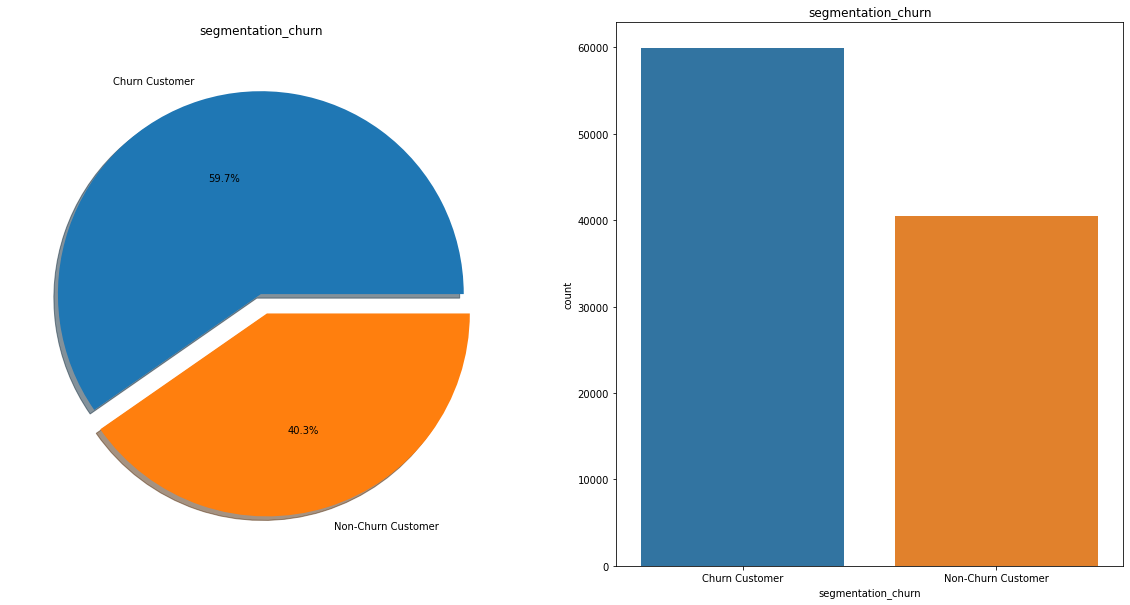

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
fix_segmentation['segmentation_churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('segmentation_churn')
ax[0].set_ylabel('')
sns.countplot('segmentation_churn',data=fix_segmentation,ax=ax[1])
ax[1].set_title('segmentation_churn')
plt.show()

## Preprocessing

In [ ]:
X = fix_segmentation.drop(['customer_id', 'segmentation_churn'], axis=1)
y = fix_segmentation['segmentation_churn']

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
categorical = ['payment_type', 'first_segmentation', 'monetary_segmentation']

for i in categorical:
  X[i] = label_encoder.fit_transform(X[i])

X

,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation
0,1,1,8,114,1,114,2
1,1,1,5,67,3,67,2
2,1,1,10,195,3,195,2
3,0,1,1,179,3,179,2
4,0,1,1,107,2,107,2
...,...,...,...,...,...,...,...
100404,1,9,9,5,0,0,1
100405,3,18,18,726,0,40,1
100406,1,1,3,63,2,63,2
100407,1,1,2,214,2,214,2


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling 1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr_model.predict(X_test)
print('Classification Report for Logistic Regression')
print(' ')
print(classification_report(y_test, y_pred_lr))
print('-'*50)

Classification Report for Logistic Regression
 
                    precision    recall  f1-score   support

    Churn Customer       0.60      0.99      0.75     12020
Non-Churn Customer       0.48      0.01      0.02      8062

          accuracy                           0.60     20082
         macro avg       0.54      0.50      0.38     20082
      weighted avg       0.55      0.60      0.45     20082

--------------------------------------------------


In [ ]:
lr_score = lr_model.score(X_test, y_test)
lr_score

0.5982969823722737

Confussion Matrix for Logistic Regression
 


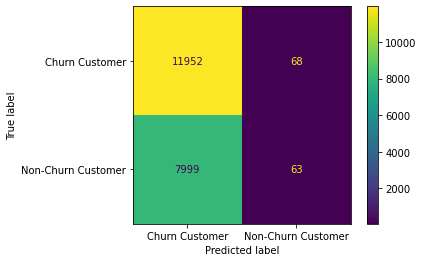

In [ ]:
print('Confussion Matrix for Logistic Regression')
print(' ')
cm_lr = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot()
plt.show()

### K Nearest Neighbor

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn_model.predict(X_test)
print('Classification Report for K Nearest Neighbor')
print(' ')
print(classification_report(y_test, y_pred_knn))
print('-'*50)

Classification Report for K Nearest Neighbor
 
                    precision    recall  f1-score   support

    Churn Customer       0.83      0.75      0.78     12020
Non-Churn Customer       0.67      0.77      0.72      8062

          accuracy                           0.76     20082
         macro avg       0.75      0.76      0.75     20082
      weighted avg       0.76      0.76      0.76     20082

--------------------------------------------------


In [ ]:
knn_score = knn_model.score(X_test, y_test)
knn_score

0.7553032566477442

Confussion Matrix for K Nearest Neighbor
 


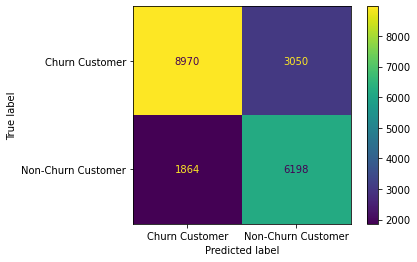

In [ ]:
print('Confussion Matrix for K Nearest Neighbor')
print(' ')
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_model.classes_)
disp_knn.plot()
plt.show()

### Decision Tree

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc_model.predict(X_test)
print('Classification Report for Decision Tree')
print(' ')
print(classification_report(y_test, y_pred_dtc))
print('-'*50)

Classification Report for Decision Tree
 
                    precision    recall  f1-score   support

    Churn Customer       0.92      0.79      0.85     12020
Non-Churn Customer       0.74      0.90      0.81      8062

          accuracy                           0.83     20082
         macro avg       0.83      0.84      0.83     20082
      weighted avg       0.85      0.83      0.83     20082

--------------------------------------------------


In [ ]:
dtc_score = dtc_model.score(X_test, y_test)
dtc_score

0.8323374165919729

Confussion Matrix for Decision Tree
 


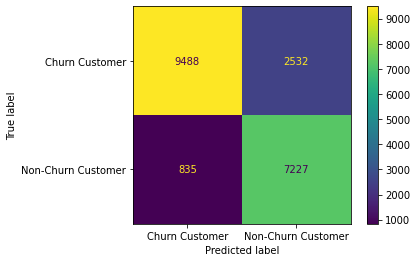

In [ ]:
print('Confussion Matrix for Decision Tree')
print(' ')
cm_dtc = confusion_matrix(y_test, y_pred_dtc, labels=dtc_model.classes_)
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc, display_labels=dtc_model.classes_)
disp_dtc.plot()
plt.show()

### Random Forest

In [ ]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rdf = rdf_model.predict(X_test)
print('Classification Report for Random Forest')
print(' ')
print(classification_report(y_test, y_pred_rdf))
print('-'*50)

Classification Report for Random Forest
 
                    precision    recall  f1-score   support

    Churn Customer       0.94      0.78      0.85     12020
Non-Churn Customer       0.74      0.92      0.82      8062

          accuracy                           0.84     20082
         macro avg       0.84      0.85      0.84     20082
      weighted avg       0.86      0.84      0.84     20082

--------------------------------------------------


In [ ]:
rdf_score = rdf_model.score(X_test, y_test)
rdf_score

0.8401055671745842

Confussion Matrix for Random Forest
 


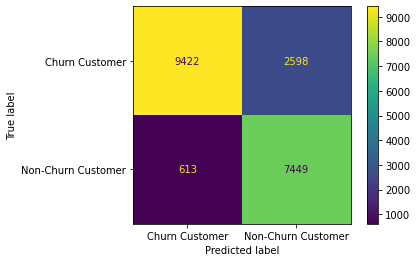

In [ ]:
print('Confussion Matrix for Random Forest')
print(' ')
cm_rdf = confusion_matrix(y_test, y_pred_rdf, labels=rdf_model.classes_)
disp_rdf = ConfusionMatrixDisplay(confusion_matrix=cm_rdf, display_labels=rdf_model.classes_)
disp_rdf.plot()
plt.show()

### Naive Bayes

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb = gnb_model.predict(X_test)
print('Classification Report for Gaussian Naive Bayes')
print(' ')
print(classification_report(y_test, y_pred_gnb))
print('-'*50)

Classification Report for Gaussian Naive Bayes
 
                    precision    recall  f1-score   support

    Churn Customer       0.62      0.01      0.01     12020
Non-Churn Customer       0.40      0.99      0.57      8062

          accuracy                           0.40     20082
         macro avg       0.51      0.50      0.29     20082
      weighted avg       0.53      0.40      0.24     20082

--------------------------------------------------


In [ ]:
gnb_score = gnb_model.score(X_test, y_test)
gnb_score

0.4027985260432228

Confussion Matrix for Gaussian Naive Bayes
 


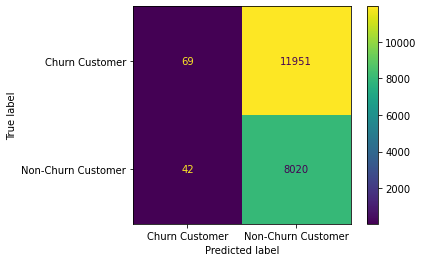

In [ ]:
print('Confussion Matrix for Gaussian Naive Bayes')
print(' ')
cm_gnb = confusion_matrix(y_test, y_pred_gnb, labels=gnb_model.classes_)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=gnb_model.classes_)
disp_gnb.plot()
plt.show()

### AdaBoost

In [ ]:
adb_model = AdaBoostClassifier()
adb_model.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred_adb = adb_model.predict(X_test)
print('Classification Report for AdaBoost')
print(' ')
print(classification_report(y_test, y_pred_adb))
print('-'*50)

Classification Report for AdaBoost
 
                    precision    recall  f1-score   support

    Churn Customer       1.00      0.76      0.86     12020
Non-Churn Customer       0.74      1.00      0.85      8062

          accuracy                           0.86     20082
         macro avg       0.87      0.88      0.86     20082
      weighted avg       0.89      0.86      0.86     20082

--------------------------------------------------


In [ ]:
adb_score = adb_model.score(X_test, y_test)
adb_score

0.8565879892440992

Confussion Matrix for AdaBoost
 


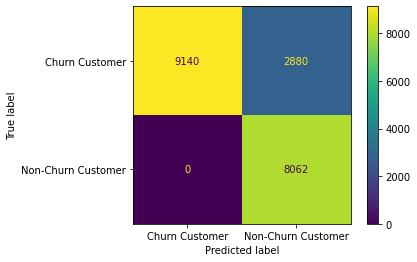

In [ ]:
print('Confussion Matrix for AdaBoost')
print(' ')
cm_adb = confusion_matrix(y_test, y_pred_adb, labels=adb_model.classes_)
disp_adb = ConfusionMatrixDisplay(confusion_matrix=cm_adb, display_labels=adb_model.classes_)
disp_adb.plot()
plt.show()

### Comparing Base Modeling 1

In [ ]:
title = "Comparison Base Modeling"
x = title.center(56, "=")
print(x)

print(' ')

print('Accuracy model Logistic Regression   :', lr_score)
print(' ')

print('Accuracy model K Nearest Neighbor    :', knn_score)
print(' ')

print('Accuracy model Decision Tree         :', dtc_score)
print(' ')

print('Accuracy model Random Forest         :', rdf_score)
print(' ')

print('Accuracy model Naive Bayes           :', gnb_score)
print(' ')

print('Accuracy model AdaBoost              :', adb_score)
print(' ')

================Comparison Base Modeling================
 
Accuracy model Logistic Regression   : 0.5982969823722737
 
Accuracy model K Nearest Neighbor    : 0.7553032566477442
 
Accuracy model Decision Tree         : 0.8323374165919729
 
Accuracy model Random Forest         : 0.8401055671745842
 
Accuracy model Naive Bayes           : 0.4027985260432228
 
Accuracy model AdaBoost              : 0.8565879892440992
 


# Add Features

## Feature Engineering #2

In [ ]:
new_fix_segmentation = fix_segmentation.merge(orders, on='customer_id', how='inner')
new_fix_segmentation

,customer_id,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,segmentation_churn,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00012a2ce6f8dcda20d059ce98491703,credit_card,1,8,114,Defecting,114,Normal,Churn Customer,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00
1,000161a058600d5901f007fab4c27140,credit_card,1,5,67,Inactive,67,Normal,Churn Customer,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,1,10,195,Inactive,195,Normal,Churn Customer,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00
3,0002414f95344307404f0ace7a26f1d5,boleto,1,1,179,Inactive,179,Normal,Churn Customer,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00
4,000379cdec625522490c315e70c7a9fb,boleto,1,1,107,First Timer,107,Normal,Non-Churn Customer,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,9,9,5,Active,0,Low Spender,Non-Churn Customer,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00
100405,fffecc9f79fd8c764f843e9951b11341,voucher,18,18,726,Active,40,Low Spender,Non-Churn Customer,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,1,3,63,First Timer,63,Normal,Non-Churn Customer,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29 00:00:00
100407,ffff42319e9b2d713724ae527742af25,credit_card,1,2,214,First Timer,214,Normal,Non-Churn Customer,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25 00:00:00


In [ ]:
new_fix_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100409 entries, 0 to 100408
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customer_id                    100409 non-null  object
 1   payment_type                   100409 non-null  object
 2   total_order                    100409 non-null  int64 
 3   total_installments             100409 non-null  int64 
 4   total_payment                  100409 non-null  int64 
 5   first_segmentation             100409 non-null  object
 6   basket_size                    100409 non-null  int64 
 7   monetary_segmentation          100409 non-null  object
 8   segmentation_churn             100409 non-null  object
 9   order_id                       100409 non-null  object
 10  order_status                   100409 non-null  object
 11  order_purchase_timestamp       100409 non-null  object
 12  order_approved_at              100409 non-nu

In [ ]:
from datetime import datetime as dt

new_fix_segmentation['diff_approved_purchase'] = (pd.to_datetime(new_fix_segmentation.order_approved_at) - pd.to_datetime(new_fix_segmentation.order_purchase_timestamp)).dt.seconds
new_fix_segmentation['diff_carrier_approved'] = (pd.to_datetime(new_fix_segmentation.order_delivered_carrier_date) - pd.to_datetime(new_fix_segmentation.order_approved_at)).dt.days
new_fix_segmentation['diff_delivered_carrier'] = (pd.to_datetime(new_fix_segmentation.order_delivered_customer_date) - pd.to_datetime(new_fix_segmentation.order_delivered_carrier_date)).dt.days
new_fix_segmentation['diff_estimated_delivered'] = (pd.to_datetime(new_fix_segmentation.order_estimated_delivery_date) - pd.to_datetime(new_fix_segmentation.order_delivered_customer_date)).dt.days

In [ ]:
new_fix_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100409 entries, 0 to 100408
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customer_id                    100409 non-null  object
 1   payment_type                   100409 non-null  object
 2   total_order                    100409 non-null  int64 
 3   total_installments             100409 non-null  int64 
 4   total_payment                  100409 non-null  int64 
 5   first_segmentation             100409 non-null  object
 6   basket_size                    100409 non-null  int64 
 7   monetary_segmentation          100409 non-null  object
 8   segmentation_churn             100409 non-null  object
 9   order_id                       100409 non-null  object
 10  order_status                   100409 non-null  object
 11  order_purchase_timestamp       100409 non-null  object
 12  order_approved_at              100409 non-nu

In [ ]:
new_fix_segmentation

,customer_id,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,segmentation_churn,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_approved_purchase,diff_carrier_approved,diff_delivered_carrier,diff_estimated_delivered
0,00012a2ce6f8dcda20d059ce98491703,credit_card,1,8,114,Defecting,114,Normal,Churn Customer,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00,1626,2,11,5
1,000161a058600d5901f007fab4c27140,credit_card,1,5,67,Inactive,67,Normal,Churn Customer,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00,880,3,5,9
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,1,10,195,Inactive,195,Normal,Churn Customer,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00,517,1,4,15
3,0002414f95344307404f0ace7a26f1d5,boleto,1,1,179,Inactive,179,Normal,Churn Customer,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00,50467,2,25,0
4,000379cdec625522490c315e70c7a9fb,boleto,1,1,107,First Timer,107,Normal,Non-Churn Customer,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00,48482,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,9,9,5,Active,0,Low Spender,Non-Churn Customer,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00,661,1,10,16
100405,fffecc9f79fd8c764f843e9951b11341,voucher,18,18,726,Active,40,Low Spender,Non-Churn Customer,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00,661,1,10,16
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,1,3,63,First Timer,63,Normal,Non-Churn Customer,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29 00:00:00,1115,2,14,20
100407,ffff42319e9b2d713724ae527742af25,credit_card,1,2,214,First Timer,214,Normal,Non-Churn Customer,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25 00:00:00,1398,2,2,6


In [ ]:
fix_segmentation_2 = new_fix_segmentation.drop(['order_id', 'order_status', 'order_purchase_timestamp',	'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',	'order_estimated_delivery_date'], axis=1)
fix_segmentation_2

,customer_id,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,segmentation_churn,diff_approved_purchase,diff_carrier_approved,diff_delivered_carrier,diff_estimated_delivered
0,00012a2ce6f8dcda20d059ce98491703,credit_card,1,8,114,Defecting,114,Normal,Churn Customer,1626,2,11,5
1,000161a058600d5901f007fab4c27140,credit_card,1,5,67,Inactive,67,Normal,Churn Customer,880,3,5,9
2,0001fd6190edaaf884bcaf3d49edf079,credit_card,1,10,195,Inactive,195,Normal,Churn Customer,517,1,4,15
3,0002414f95344307404f0ace7a26f1d5,boleto,1,1,179,Inactive,179,Normal,Churn Customer,50467,2,25,0
4,000379cdec625522490c315e70c7a9fb,boleto,1,1,107,First Timer,107,Normal,Non-Churn Customer,48482,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100404,fffecc9f79fd8c764f843e9951b11341,credit_card,9,9,5,Active,0,Low Spender,Non-Churn Customer,661,1,10,16
100405,fffecc9f79fd8c764f843e9951b11341,voucher,18,18,726,Active,40,Low Spender,Non-Churn Customer,661,1,10,16
100406,fffeda5b6d849fbd39689bb92087f431,credit_card,1,3,63,First Timer,63,Normal,Non-Churn Customer,1115,2,14,20
100407,ffff42319e9b2d713724ae527742af25,credit_card,1,2,214,First Timer,214,Normal,Non-Churn Customer,1398,2,2,6


In [ ]:
fix_segmentation_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100409 entries, 0 to 100408
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_id               100409 non-null  object
 1   payment_type              100409 non-null  object
 2   total_order               100409 non-null  int64 
 3   total_installments        100409 non-null  int64 
 4   total_payment             100409 non-null  int64 
 5   first_segmentation        100409 non-null  object
 6   basket_size               100409 non-null  int64 
 7   monetary_segmentation     100409 non-null  object
 8   segmentation_churn        100409 non-null  object
 9   diff_approved_purchase    100409 non-null  int64 
 10  diff_carrier_approved     100409 non-null  int64 
 11  diff_delivered_carrier    100409 non-null  int64 
 12  diff_estimated_delivered  100409 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 10.7+ MB


## Preprocessing

In [ ]:
X_new = fix_segmentation_2.drop(['customer_id', 'segmentation_churn'], axis=1)
y_new = fix_segmentation_2['segmentation_churn']

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
categorical = ['payment_type', 'first_segmentation', 'monetary_segmentation']

for i in categorical:
  X_new[i] = label_encoder.fit_transform(X_new[i])

X_new

,payment_type,total_order,total_installments,total_payment,first_segmentation,basket_size,monetary_segmentation,diff_approved_purchase,diff_carrier_approved,diff_delivered_carrier,diff_estimated_delivered
0,1,1,8,114,1,114,2,1626,2,11,5
1,1,1,5,67,3,67,2,880,3,5,9
2,1,1,10,195,3,195,2,517,1,4,15
3,0,1,1,179,3,179,2,50467,2,25,0
4,0,1,1,107,2,107,2,48482,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...
100404,1,9,9,5,0,0,1,661,1,10,16
100405,3,18,18,726,0,40,1,661,1,10,16
100406,1,1,3,63,2,63,2,1115,2,14,20
100407,1,1,2,214,2,214,2,1398,2,2,6


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Modeling #2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression

In [ ]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr_2 = lr_model_2.predict(X_test)
print('Classification Report for Logistic Regression')
print(' ')
print(classification_report(y_test, y_pred_lr_2))
print('-'*50)

Classification Report for Logistic Regression
 
                    precision    recall  f1-score   support

    Churn Customer       0.61      0.99      0.75     12020
Non-Churn Customer       0.72      0.05      0.10      8062

          accuracy                           0.61     20082
         macro avg       0.66      0.52      0.43     20082
      weighted avg       0.65      0.61      0.49     20082

--------------------------------------------------


In [ ]:
lr_score_2 = lr_model_2.score(X_test, y_test)
lr_score_2

0.6116422667065033

Confussion Matrix for Logistic Regression
 


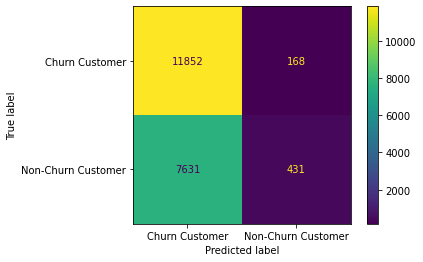

In [ ]:
print('Confussion Matrix for Logistic Regression')
print(' ')
cm_lr_2 = confusion_matrix(y_test, y_pred_lr_2, labels=lr_model_2.classes_)
disp_lr_2 = ConfusionMatrixDisplay(confusion_matrix=cm_lr_2, display_labels=lr_model_2.classes_)
disp_lr_2.plot()
plt.show()

### K Nearest Neighbor

In [ ]:
knn_model_2 = KNeighborsClassifier()
knn_model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn_2 = knn_model_2.predict(X_test)
print('Classification Report for K Nearest Neighbor')
print(' ')
print(classification_report(y_test, y_pred_knn_2))
print('-'*50)

Classification Report for K Nearest Neighbor
 
                    precision    recall  f1-score   support

    Churn Customer       0.65      0.71      0.68     12020
Non-Churn Customer       0.49      0.43      0.46      8062

          accuracy                           0.59     20082
         macro avg       0.57      0.57      0.57     20082
      weighted avg       0.59      0.59      0.59     20082

--------------------------------------------------


In [ ]:
knn_score_2 = knn_model_2.score(X_test, y_test)
knn_score_2

0.5934169903396076

Confussion Matrix for K Nearest Neighbor
 


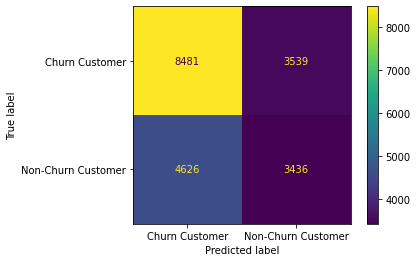

In [ ]:
print('Confussion Matrix for K Nearest Neighbor')
print(' ')
cm_knn_2 = confusion_matrix(y_test, y_pred_knn_2, labels=knn_model_2.classes_)
disp_knn_2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn_2, display_labels=knn_model_2.classes_)
disp_knn_2.plot()
plt.show()

### Decision Tree

In [ ]:
dtc_model_2 = DecisionTreeClassifier()
dtc_model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc_2 = dtc_model_2.predict(X_test)
print('Classification Report for Decision Tree')
print(' ')
print(classification_report(y_test, y_pred_dtc_2))
print('-'*50)

Classification Report for Decision Tree
 
                    precision    recall  f1-score   support

    Churn Customer       0.86      0.87      0.86     12020
Non-Churn Customer       0.80      0.78      0.79      8062

          accuracy                           0.83     20082
         macro avg       0.83      0.82      0.83     20082
      weighted avg       0.83      0.83      0.83     20082

--------------------------------------------------


In [ ]:
dtc_score_2 = dtc_model_2.score(X_test, y_test)
dtc_score_2

0.8332835374962653

Confussion Matrix for Decision Tree
 


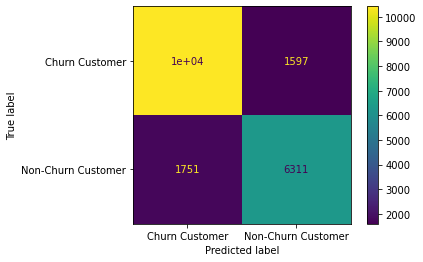

In [ ]:
print('Confussion Matrix for Decision Tree')
print(' ')
cm_dtc_2 = confusion_matrix(y_test, y_pred_dtc_2, labels=dtc_model_2.classes_)
disp_dtc_2 = ConfusionMatrixDisplay(confusion_matrix=cm_dtc_2, display_labels=dtc_model_2.classes_)
disp_dtc_2.plot()
plt.show()

### Random Forest

In [ ]:
rdf_model_2 = RandomForestClassifier()
rdf_model_2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rdf_2 = rdf_model_2.predict(X_test)
print('Classification Report for Random Forest')
print(' ')
print(classification_report(y_test, y_pred_rdf_2))
print('-'*50)

Classification Report for Random Forest
 
                    precision    recall  f1-score   support

    Churn Customer       0.93      0.84      0.88     12020
Non-Churn Customer       0.79      0.91      0.84      8062

          accuracy                           0.87     20082
         macro avg       0.86      0.87      0.86     20082
      weighted avg       0.87      0.87      0.87     20082

--------------------------------------------------


In [ ]:
rdf_score_2 = rdf_model_2.score(X_test, y_test)
rdf_score_2

0.8652524648939348

Confussion Matrix for Random Forest
 


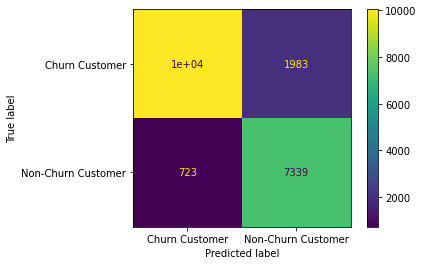

In [ ]:
print('Confussion Matrix for Random Forest')
print(' ')
cm_rdf_2 = confusion_matrix(y_test, y_pred_rdf_2, labels=rdf_model_2.classes_)
disp_rdf_2 = ConfusionMatrixDisplay(confusion_matrix=cm_rdf_2, display_labels=rdf_model_2.classes_)
disp_rdf_2.plot()
plt.show()

### Naive Bayes

In [ ]:
gnb_model_2 = GaussianNB()
gnb_model_2.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_gnb_2 = gnb_model_2.predict(X_test)
print('Classification Report for Gaussian Naive Bayes')
print(' ')
print(classification_report(y_test, y_pred_gnb_2))
print('-'*50)

Classification Report for Gaussian Naive Bayes
 
                    precision    recall  f1-score   support

    Churn Customer       0.67      0.03      0.05     12020
Non-Churn Customer       0.40      0.98      0.57      8062

          accuracy                           0.41     20082
         macro avg       0.54      0.50      0.31     20082
      weighted avg       0.56      0.41      0.26     20082

--------------------------------------------------


In [ ]:
gnb_score_2 = gnb_model_2.score(X_test, y_test)
gnb_score_2

0.40947116821033763

Confussion Matrix for Gaussian Naive Bayes
 


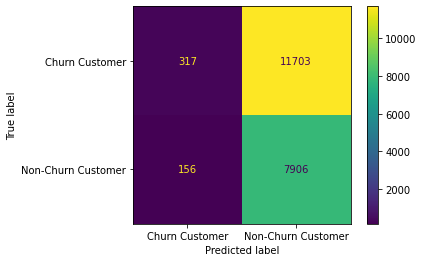

In [ ]:
print('Confussion Matrix for Gaussian Naive Bayes')
print(' ')
cm_gnb_2 = confusion_matrix(y_test, y_pred_gnb_2, labels=gnb_model_2.classes_)
disp_gnb_2 = ConfusionMatrixDisplay(confusion_matrix=cm_gnb_2, display_labels=gnb_model_2.classes_)
disp_gnb_2.plot()
plt.show()

### AdaBoost

In [ ]:
adb_model_2 = AdaBoostClassifier()
adb_model_2.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred_adb_2 = adb_model_2.predict(X_test)
print('Classification Report for AdaBoost')
print(' ')
print(classification_report(y_test, y_pred_adb_2))
print('-'*50)

Classification Report for AdaBoost
 
                    precision    recall  f1-score   support

    Churn Customer       0.94      0.82      0.88     12020
Non-Churn Customer       0.77      0.93      0.84      8062

          accuracy                           0.86     20082
         macro avg       0.86      0.87      0.86     20082
      weighted avg       0.88      0.86      0.86     20082

--------------------------------------------------


In [ ]:
adb_score_2 = adb_model_2.score(X_test, y_test)
adb_score_2

0.8631112439000099

Confussion Matrix for AdaBoost
 


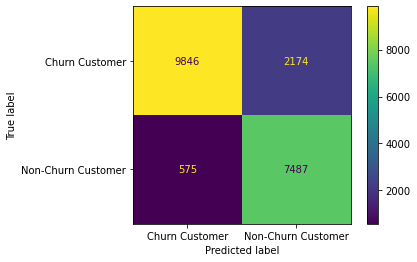

In [ ]:
print('Confussion Matrix for AdaBoost')
print(' ')
cm_adb_2 = confusion_matrix(y_test, y_pred_adb_2, labels=adb_model_2.classes_)
disp_adb_2 = ConfusionMatrixDisplay(confusion_matrix=cm_adb_2, display_labels=adb_model_2.classes_)
disp_adb_2.plot()
plt.show()

### Comparing Model 1 and 2

In [ ]:
title = "Comparison Model 1 dan 2"
x = title.center(34, "=")
print(x)

print(' ')

print('Accuracy model Logistic Regression')
print('Model 1 :', lr_score)
print('Model 2 :', lr_score_2)
print(' ')

print('Accuracy model K Nearest Neighbor')
print('Model 1 :', knn_score)
print('Model 2 :', knn_score_2)
print(' ')

print('Accuracy model Decision Tree')
print('Model 1 :', dtc_score)
print('Model 2 :', dtc_score_2)
print(' ')

print('Accuracy model Random Forest')
print('Model 1 :', rdf_score)
print('Model 2 :', rdf_score_2)
print(' ')

print('Accuracy model Naive Bayes')
print('Model 1 :', gnb_score)
print('Model 2 :', gnb_score_2)
print(' ')

print('Accuracy model AdaBoost')
print('Model 1 :', adb_score)
print('Model 2 :', adb_score_2)
print(' ')

=====Comparison Model 1 dan 2=====
 
Accuracy model Logistic Regression
Model 1 : 0.5982969823722737
Model 2 : 0.6116422667065033
 
Accuracy model K Nearest Neighbor
Model 1 : 0.7553032566477442
Model 2 : 0.5934169903396076
 
Accuracy model Decision Tree
Model 1 : 0.8323374165919729
Model 2 : 0.8332835374962653
 
Accuracy model Random Forest
Model 1 : 0.8401055671745842
Model 2 : 0.8652524648939348
 
Accuracy model Naive Bayes
Model 1 : 0.4027985260432228
Model 2 : 0.40947116821033763
 
Accuracy model AdaBoost
Model 1 : 0.8565879892440992
Model 2 : 0.8631112439000099
 


# Hyperparameter Tuning

## Decision Tree

In [ ]:
# max_depth
dtc_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_model_3.fit(X_train, y_train)

y_pred_dtc_3 = dtc_model_3.predict(X_test)
print('Classification Report for Decision Tree')
print(' ')
print(classification_report(y_test, y_pred_dtc_3))
print('-'*50)

print(' ')
dtc_score_3 = dtc_model_3.score(X_test, y_test)
print('Accuracy score :', dtc_score_3)

Classification Report for Decision Tree
 
                    precision    recall  f1-score   support

    Churn Customer       1.00      0.76      0.86     12020
Non-Churn Customer       0.74      1.00      0.85      8062

          accuracy                           0.86     20082
         macro avg       0.87      0.88      0.86     20082
      weighted avg       0.89      0.86      0.86     20082

--------------------------------------------------
 
Accuracy score : 0.8565879892440992


In [ ]:
# max_leaf_nodes
dtc_model_4 = DecisionTreeClassifier(max_leaf_nodes=30, random_state=42)
dtc_model_4.fit(X_train, y_train)

y_pred_dtc_4 = dtc_model_4.predict(X_test)
print('Classification Report for Decision Tree')
print(' ')
print(classification_report(y_test, y_pred_dtc_4))
print('-'*50)

print(' ')
dtc_score_4 = dtc_model_4.score(X_test, y_test)
print('Accuracy score :', dtc_score_4)

Classification Report for Decision Tree
 
                    precision    recall  f1-score   support

    Churn Customer       0.98      0.79      0.87     12020
Non-Churn Customer       0.75      0.98      0.85      8062

          accuracy                           0.86     20082
         macro avg       0.87      0.88      0.86     20082
      weighted avg       0.89      0.86      0.86     20082

--------------------------------------------------
 
Accuracy score : 0.8617667562991734


## Random Forest

In [ ]:
# n_estimators
rdf_model_3 = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)
rdf_model_3.fit(X_train, y_train)

y_pred_rdf_3 = rdf_model_3.predict(X_test)
print('Classification Report for Random Forest')
print(' ')
print(classification_report(y_test, y_pred_rdf_3))
print('-'*50)

print(' ')
rdf_score_3 = rdf_model_3.score(X_test, y_test)
print('Accuracy score :', rdf_score_3)

Classification Report for Random Forest
 
                    precision    recall  f1-score   support

    Churn Customer       0.89      0.86      0.87     12020
Non-Churn Customer       0.80      0.84      0.82      8062

          accuracy                           0.85     20082
         macro avg       0.84      0.85      0.85     20082
      weighted avg       0.85      0.85      0.85     20082

--------------------------------------------------
 
Accuracy score : 0.8500647345881884


In [ ]:
# max_features
rdf_model_4 = RandomForestClassifier(random_state=42, n_jobs=-1, max_features=None)
rdf_model_4.fit(X_train, y_train)

y_pred_rdf_4 = rdf_model_4.predict(X_test)
print('Classification Report for Random Forest')
print(' ')
print(classification_report(y_test, y_pred_rdf_4))
print('-'*50)

print(' ')
rdf_score_4 = rdf_model_4.score(X_test, y_test)
print('Accuracy score :', rdf_score_4)

Classification Report for Random Forest
 
                    precision    recall  f1-score   support

    Churn Customer       0.92      0.84      0.88     12020
Non-Churn Customer       0.79      0.89      0.84      8062

          accuracy                           0.86     20082
         macro avg       0.86      0.87      0.86     20082
      weighted avg       0.87      0.86      0.86     20082

--------------------------------------------------
 
Accuracy score : 0.8637585897818942


# Comparison Model :
1. Base Modeling 1
2. Modeling 2 (After add features)
3. Modeling After Hyperparameter Tuning

In [ ]:
title = "Comparison Model"
x = title.center(85, "=")
print(x)

print(' ')
print('-'*85)


print('Accuracy model Logistic Regression')
print('1. Base Modeling 1                                            :', lr_score)
print('2. Modeling 2 (After add features)                            :', lr_score_2)
print('-'*85)
print(' ')

print('Accuracy model K Nearest Neighbor')
print('1. Base Modeling 1                                            :', knn_score)
print('2. Modeling 2 (After add features)                            :', knn_score_2)
print('-'*85)
print(' ')

print('Accuracy model Decision Tree')
print('1. Base Modeling 1                                            :', dtc_score)
print('2. Modeling 2 (After add features)                            :', dtc_score_2)
print('3. Modeling After Hyperparameter Tuning using max_depth       :', dtc_score_3)
print('4. Modeling After Hyperparameter Tuning using max_leaf_nodes  :', dtc_score_4)
print('-'*85)
print(' ')

print('Accuracy model Random Forest')
print('1. Base Modeling 1                                            :', rdf_score)
print('2. Modeling 2 (After add features)                            :', rdf_score_2)
print('3. Modeling After Hyperparameter Tuning using n_estimators    :', rdf_score_3)
print('4. Modeling After Hyperparameter Tuning using max_features    :', rdf_score_4)
print('-'*85)
print(' ')

print('Accuracy model Naive Bayes')
print('1. Base Modeling 1                                            :', gnb_score)
print('2. Modeling 2 (After add features)                            :', gnb_score_2)
print('-'*85)
print(' ')

print('Accuracy model AdaBoost')
print('1. Base Modeling 1                                            :', adb_score)
print('2. Modeling 2 (After add features)                            :', adb_score_2)
print('-'*85)
print(' ')

===================================Comparison Model==================================
 
-------------------------------------------------------------------------------------
Accuracy model Logistic Regression
1. Base Modeling 1                                            : 0.5982969823722737
2. Modeling 2 (After add features)                            : 0.6116422667065033
-------------------------------------------------------------------------------------
 
Accuracy model K Nearest Neighbor
1. Base Modeling 1                                            : 0.7553032566477442
2. Modeling 2 (After add features)                            : 0.5934169903396076
-------------------------------------------------------------------------------------
 
Accuracy model Decision Tree
1. Base Modeling 1                                            : 0.8323374165919729
2. Modeling 2 (After add features)                            : 0.8332835374962653
3. Modeling After Hyperparameter Tuning using max_dept

# Kesimpulan

Berdasarkan Percobaan Modeling yang telah dilakukan, diperoleh Model dengan akurasi tertinggi adalah Random Forest Model ke-2. <br>
Modeling ke-2 ini adalah model Random Forest yang diberikan fitur tambahan. <br>
Diperoleh Akurasi sebesar `0.8652524648939348` atau `86.52%`